# Analysis of basic scholar profiles

## setup

In [ ]:
import csv
import numpy as np
import sys
from pathlib import Path
import pickle
import pandas as pd

In [ ]:
scholar_all = np.load(
    'gs_scholars_all_upd.npy', allow_pickle=True
)

In [ ]:
scholar_all[0]

{'academic': False,
 'academic_age': 31,
 'academic_lifespan': 28,
 'cit_sum_before_year': {'1994': 39,
  '1995': 86,
  '1996': 187,
  '1997': 287,
  '1998': 383,
  '1999': 500,
  '2000': 615,
  '2001': 727,
  '2002': 833,
  '2003': 951,
  '2004': 1070,
  '2005': 1203,
  '2006': 1357,
  '2007': 1543,
  '2008': 1719,
  '2009': 1866,
  '2010': 2005,
  '2011': 2129,
  '2012': 2323,
  '2013': 2487,
  '2014': 2615,
  '2015': 2758,
  '2016': 2935,
  '2017': 3051,
  '2018': 3167,
  '2019': 3261,
  '2020': 3335,
  '2021': 3411},
 'citation_table': ['3539', '27'],
 'cites': {'cites': ['39',
   '47',
   '101',
   '100',
   '96',
   '117',
   '115',
   '112',
   '106',
   '118',
   '119',
   '133',
   '154',
   '186',
   '176',
   '147',
   '139',
   '124',
   '194',
   '164',
   '128',
   '143',
   '177',
   '116',
   '116',
   '94',
   '74',
   '76',
   '24'],
  'years': ['1994',
   '1995',
   '1996',
   '1997',
   '1998',
   '1999',
   '2000',
   '2001',
   '2002',
   '2003',
   '2004',
   '20

In [ ]:
df = pd.DataFrame.from_records(scholar_all)

## Introduction

In [ ]:
# use min(scholar_all[i]['cites']['years']) as the starting year to publish papers
from collections import defaultdict
year_female_dict = defaultdict(int)
year_male_dict = defaultdict(int)
year_tot_dict = defaultdict(int)
for idx, row in df.iterrows():
    year_list = row['cites']['years']
    year_list = [int(year) for year in year_list]
    # for each scholar, find its minimal year to publish papers
    year_list.sort()
    tmp_year = 0
    for year in year_list:
        if year > 1950:
            tmp_year = year
            break
    # if the publishing years of all papers of the scholar <= 1950, continue
    if tmp_year == 0:
        print(row)
        continue
    if row['gender'] == 'F':
        year_female_dict[tmp_year] += 1
    elif row['gender'] == 'M':
        year_male_dict[tmp_year] += 1
    year_tot_dict[tmp_year] += 1


In [ ]:
def get_year_bar10(year_dict):
    year_bar10_dict = defaultdict(int)
    for year, cnt in year_dict.items():
        if year < 1990:
            i = 1990
            if year < i:
                year_bar10_dict[i-10] += cnt
        else:
            i = (year // 10) * 10 + 10
            if year < i and year + 10 >= i:
                year_bar10_dict[i-10] += cnt
    return year_bar10_dict


In [ ]:
year_bar10_tot_dict = get_year_bar10(year_tot_dict)
year_bar10_tot_dict

defaultdict(int, {1980: 1146, 1990: 5436, 2000: 24098, 2010: 46965, 2020: 421})

In [ ]:
year_bar10_female_dict = get_year_bar10(year_female_dict)
year_bar10_female_dict

defaultdict(int, {1980: 72, 1990: 470, 2000: 2201, 2010: 4248, 2020: 45})

In [ ]:
year_bar10_male_dict = get_year_bar10(year_male_dict)
year_bar10_male_dict

defaultdict(int, {1980: 654, 1990: 2901, 2000: 10692, 2010: 17680, 2020: 147})

In [ ]:
tmp_1 = np.array([1146, 5436, 24098, 46965, 421])
tmp_2 = np.array([72, 470, 2201, 4248, 45])
tmp_3 = np.array([654, 2901, 10692, 17680, 147])
tmp_4 = tmp_2+tmp_3
year_female = [sum(tmp_2[:idx+1])/sum(tmp_4[:idx+1])
               for idx in range(len(tmp_1))]
year_female

[0.09917355371900827,
 0.1322919209177447,
 0.16144791053560917,
 0.17963410247186393,
 0.17990283814881106]

In [ ]:
import collections
od = collections.OrderedDict(sorted(year_tot_dict.items()))
x1, y1 = [], []
for i in od.items():
  x1.append(i[0])
  y1.append(i[1])
y1 = np.array(y1)
y1_accumul = np.array([np.sum(y1[:i+1]) for i in range(len(y1))])


In [ ]:
y1, y1_accumul, len(y1), len(y1_accumul), np.array(x1)

(array([   1,    1,    1,   12,  326,   78,   93,  133,  152,  172,  177,
         247,  291,  351,  416,  617,  538,  586,  690,  800,  900, 1103,
        1306, 1543, 1949, 2258, 2496, 2811, 3070, 3505, 4057, 4615, 4905,
        5351, 5526, 5399, 5541, 5206, 4804, 3788, 1830,  406,   15]),
 array([    1,     2,     3,    15,   341,   419,   512,   645,   797,
          969,  1146,  1393,  1684,  2035,  2451,  3068,  3606,  4192,
         4882,  5682,  6582,  7685,  8991, 10534, 12483, 14741, 17237,
        20048, 23118, 26623, 30680, 35295, 40200, 45551, 51077, 56476,
        62017, 67223, 72027, 75815, 77645, 78051, 78066]),
 43,
 43,
 array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
        1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
        2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]))

In [ ]:
x1[1], x1[11], x1[21], x1[31], x1[41], y1_accumul[1], y1_accumul[11], y1_accumul[21], y1_accumul[31], y1_accumul[41]

(1980, 1990, 2000, 2010, 2020, 2, 1393, 7685, 35295, 78051)

In [ ]:
tmp_y = [2, 1393, 7685, 35295, 78051]

In [ ]:
tmp_y, year_female

([2, 1393, 7685, 35295, 78051],
 [0.09917355371900827,
  0.1322919209177447,
  0.16144791053560917,
  0.17963410247186393,
  0.17990283814881106])

In [ ]:
np.array(tmp_y) * np.array(year_female)

array([1.98347107e-01, 1.84282646e+02, 1.24072719e+03, 6.34018565e+03,
       1.40415964e+04])

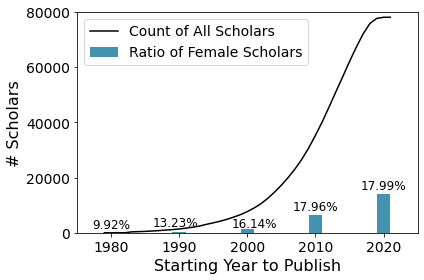

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
plot1, = ax.plot(x1, y1_accumul, color='black', label = 'Count of All Scholars')
ax.set_ylabel('# Scholars', fontsize=16)
ax.set_xlabel('Starting Year to Publish', fontsize=16)
plot2 = ax.bar([1980, 1990, 2000, 2010, 2020], [0.1983, 184.28, 1240.73, 6340.186, 14041.596], width=2, fill=True, color='#4393b0', label = 'Ratio of Female Scholars')
ax.set_xlim(1975, 2025)
ax.set_ylim(0, 80000)
ax.tick_params(axis='both', labelsize=14)
plt.tight_layout()
rects = ax.patches
labels = ["{:.2%}".format(item) for item in year_female]
cnt = 0
for rect, label in zip(rects, labels):
    height = rect.get_height()
    if cnt == 1:
      ax.text(
        rect.get_x() + rect.get_width() / 2-0.5, height+1200, label, ha="center", va="bottom", fontsize=12
      )
    elif cnt == 2:
      ax.text(
        rect.get_x() + rect.get_width() / 2+1, height-300, label, ha="center", va="bottom", fontsize=12
      )
    else:
      ax.text(
        rect.get_x() + rect.get_width() / 2, height+600, label, ha="center", va="bottom", fontsize=12
      )
    cnt += 1
leg1 = ax.legend(fontsize=14)
leg2 = ax.legend(fontsize=14)

plt.show()
# fig.savefig('scholar/scholar_pub_trend.pdf')

## Female percentage

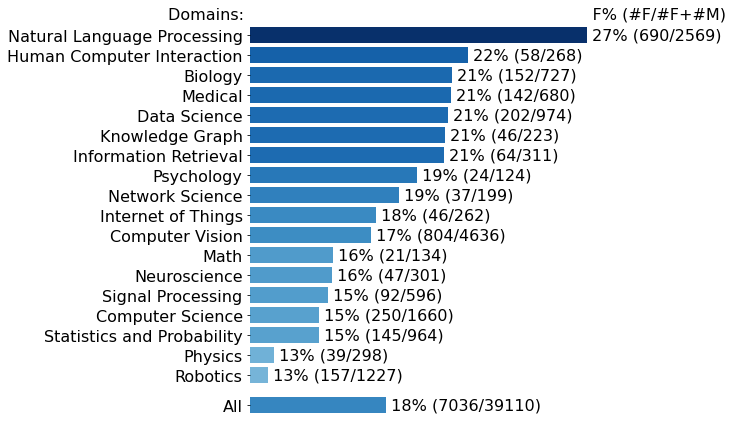

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np


fig, ax = plt.subplots(figsize=[10, 6], constrained_layout=True)

xs = np.linspace(0.1, 0.3, 19)
ys_female = np.array([690, 58, 152, 142, 202, 46, 64, 24,
                     37, 46, 804, 21, 47, 92, 250, 145, 39, 157, 7036])
ys_male = np.array([1879, 210, 575, 538, 772, 177, 247, 100,
                   162, 216, 3832, 113, 254,  504, 1410,  819, 259, 1070, 32074])
ys = ys_female/(ys_female+ys_male)
domains = [
    'Natural Language Processing',
    'Human Computer Interaction',
    'Biology',
    'Medical',
    'Data Science',
    'Knowledge Graph',
    'Information Retrieval',
    'Psychology',
    'Network Science',
    'Internet of Things',
    'Computer Vision',
    'Math',
    'Neuroscience',
    'Signal Processing',
    'Computer Science',
    'Statistics and Probability',
    'Physics',
    'Robotics',
    'All'
]

data_normalizer = mp.colors.Normalize()
color_map = mp.cm.get_cmap('Blues', 128)

#Map xs to numbers:
N = len(xs)
x_nums = np.linspace(1, 5, 19)
x_nums[-1] = 5.11111111111

#Plot a bar graph:
hbar = plt.barh(
    x_nums,
    (ys-0.12)/5,
    align="center",
    height=0.18,
    color=color_map(ys/max(ys)),
    linewidth=0.6
)

ax.invert_yaxis()  # labels read top-to-bottom
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.axes.xaxis.set_visible(False)
ax.bar_label(hbar, labels=[' {:.0%} ({:d}/{:d})'.format(round(y_item, 2), ys_female[idx],
             ys_male[idx]+ys_female[idx]) for idx, y_item in enumerate(ys)], fontsize=16)
plt.yticks(x_nums, labels=domains, fontsize=16)
fig.set_figwidth(10)
plt.title('        Domains:                                                                    F% (#F/#F+#M)', fontsize=16, y=0.96)
plt.savefig('domains.pdf', format='pdf')
plt.show()
